In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv('artist_data.csv')
df2=pd.read_csv('artwork_data.csv')

In [3]:
df1.head()

,id,name,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url
0,10093,"Abakanowicz, Magdalena",Female,born 1930,1930.0,NaN,Polska,NaN,http://www.tate.org.uk/art/artists/magdalena-a...
1,0,"Abbey, Edwin Austin",Male,1852–1911,1852.0,1911.0,"Philadelphia, United States","London, United Kingdom",http://www.tate.org.uk/art/artists/edwin-austi...
2,2756,"Abbott, Berenice",Female,1898–1991,1898.0,1991.0,"Springfield, United States","Monson, United States",http://www.tate.org.uk/art/artists/berenice-ab...
3,1,"Abbott, Lemuel Francis",Male,1760–1803,1760.0,1803.0,"Leicestershire, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/lemuel-fran...
4,622,"Abrahams, Ivor",Male,born 1935,1935.0,NaN,"Wigan, United Kingdom",NaN,http://www.tate.org.uk/art/artists/ivor-abraha...


In [4]:
df2.head()

,id,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url
0,1035,A00001,"Blake, Robert",artist,38,A Figure Bowing before a Seated Old Man with h...,date not known,"Watercolour, ink, chalk and graphite on paper....",Presented by Mrs John Richmond 1922,NaN,1922.0,support: 394 x 419 mm,394,419,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-a-fi...
1,1036,A00002,"Blake, Robert",artist,38,"Two Drawings of Frightened Figures, Probably f...",date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,1922.0,support: 311 x 213 mm,311,213,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-two-...
2,1037,A00003,"Blake, Robert",artist,38,The Preaching of Warning. Verso: An Old Man En...,?c.1785,Graphite on paper. Verso: graphite on paper,Presented by Mrs John Richmond 1922,1785,1922.0,support: 343 x 467 mm,343,467,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...
3,1038,A00004,"Blake, Robert",artist,38,Six Drawings of Figures with Outstretched Arms,date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,1922.0,support: 318 x 394 mm,318,394,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-six-...
4,1039,A00005,"Blake, William",artist,39,The Circle of the Lustful: Francesca da Rimini...,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826,1919.0,image: 243 x 335 mm,243,335,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...


## Q:1.Which gender has the most artists?

### A: Male have the most artists

In [16]:
dg=pd.DataFrame(df1.groupby('gender').size()).reset_index()

In [17]:
dg=dg.rename(columns={0:'amount'})

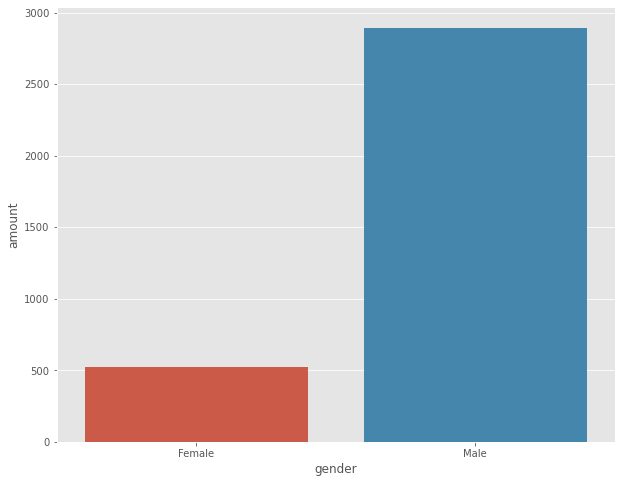

In [19]:

plt.figure(figsize=(10,8))
sns.barplot(data=dg,x='gender',y='amount')
plt.show()

## Q2.Who are the top 10 artists with the most works? How many works are there?

### A: 'Turner, Joseph Mallord William', 'Jones, George','Moore, Henry, OM, CH', 'Daniell, William', 'Beuys, Joseph','British (?) School', 'Paolozzi, Sir Eduardo', 'Flaxman, John','Phillips, Esq Tom', 'Warhol, Andy' are the top 10 artists with the most works

In [36]:
dt=df2.groupby('artist').size()

In [44]:
dt=dt.sort_values(ascending=False)

In [46]:
d10=dt.head(10)

In [54]:
d10=pd.DataFrame(d10,columns=['amount']).reset_index()

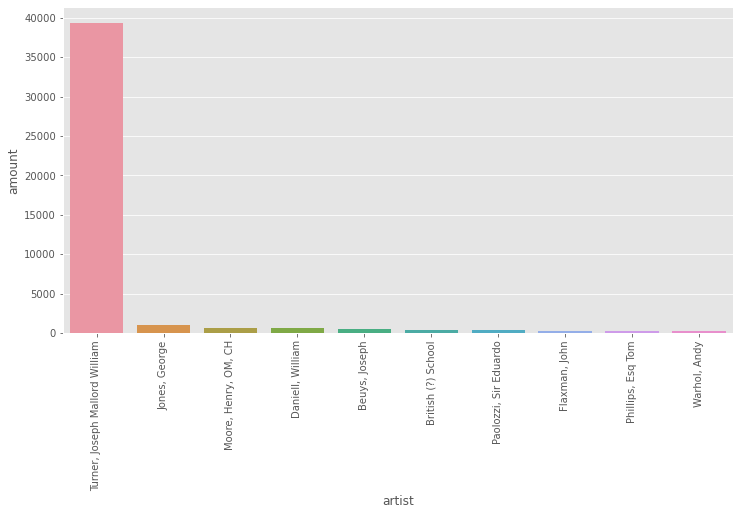

In [58]:
plt.figure(figsize=(12,6))
sns.barplot(data=d10,x='artist',y='amount')
plt.xticks(rotation=90)
plt.show()

### Q3:Split the artist's date of birth into 5 time periods. What is the proportion of the number of artists in each time period?

### A:Most artists were born between 1904 and 2004



In [65]:
dy=pd.cut(df1.yearOfBirth,bins=5,labels=['1495-1598','1599-1700','1701-1801','1802-1903','1904-2004'])

In [71]:
dy2=dy.value_counts()

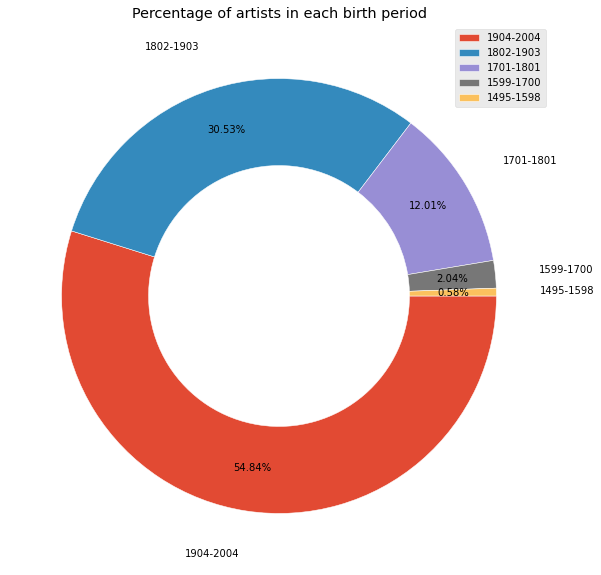

In [77]:
y=dy2.values

labels=dy2.index
plt.figure(figsize=(10,10))
plt.pie(y,labels=labels, autopct = '%0.2f%%',

        shadow= False, startangle =0,labeldistance=1.2,pctdistance=0.8,

        counterclock=False,wedgeprops=dict(width=0.4,edgecolor='w'))
plt.title('Percentage of artists in each birth period')
plt.legend()
plt.show()

### A:What is the distribution of birth and death dates for male and female artists?
### Q：There are more data for men than women, and all artists have a linear distribution of birth and death dates

In [81]:
dt=df1.dropna(subset=['yearOfDeath'])

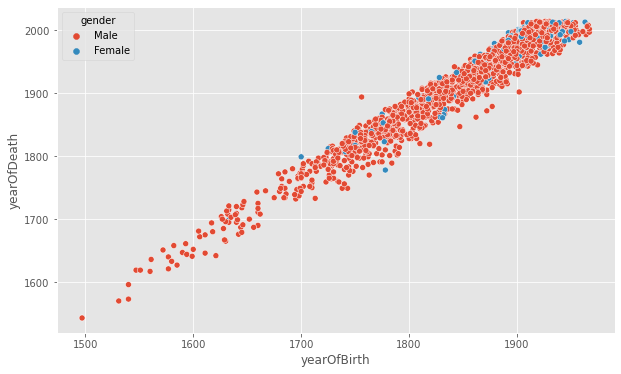

In [90]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dt,x='yearOfBirth',y='yearOfDeath',hue='gender')
plt.show()